In [2]:
import pandas as pd
import numpy as np
import seaborn as sds
import os

from utils.geo_grid import grid

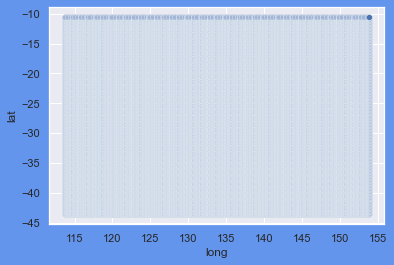

In [8]:
# read the data, drop columns with no data

aus_dt = pd.read_csv(os.path.join(os.getcwd(),"data","Frog_Occurence_Australia.csv"))
aus_dt = aus_dt.dropna(axis=1)

aus_coords = aus_dt[["decimalLatitude","decimalLongitude"]].copy()

min_lat = aus_coords.iloc[aus_coords["decimalLatitude"].idxmin()]["decimalLatitude"]
max_lat = aus_coords.iloc[aus_coords["decimalLatitude"].idxmax()]["decimalLatitude"]
min_long = aus_coords.iloc[aus_coords["decimalLongitude"].idxmin()]["decimalLongitude"]
max_long = aus_coords.iloc[aus_coords["decimalLongitude"].idxmax()]["decimalLongitude"]

aus_grid = grid(decimal_degrees=1, square_coords=(min_lat, max_lat, min_long, max_long))
aus_grid.show_grid()
